44608 Week 5 Project
Author: Scott Williamson
Date: 06/03/24
Purpose: Demonstate skills with Jupyter and EDA 

In [105]:
## Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [106]:
# Load dataset into DataFrame
df = sns.load_dataset('penguins')


# Inspect first rows of the DataFrame
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [107]:
## Initial data inspection
print(df.head(10))
print(df.shape)
print(df.dtypes)

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  
5       3650.0    Male  
6       36

In [108]:
## Print Descriptive Statistics
print(df.describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


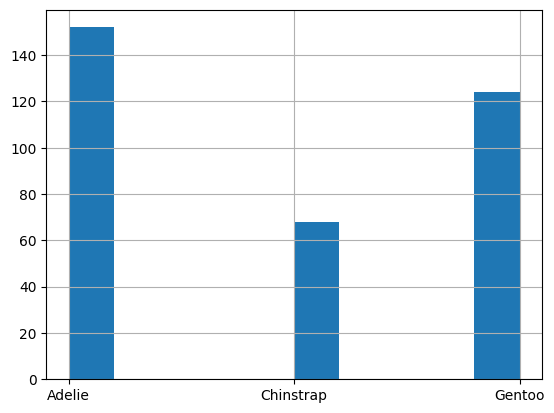

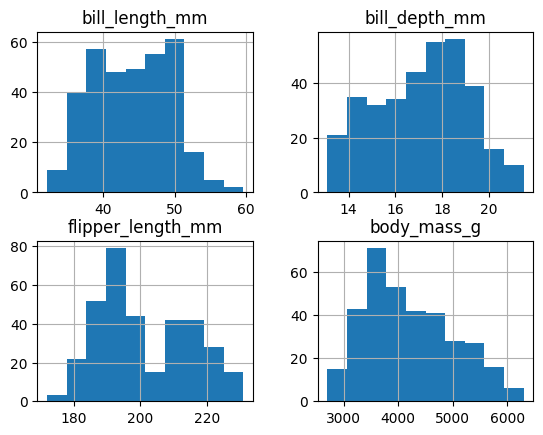

In [109]:
# Inspect histogram by numerical column
df['species'].hist()

# Inspect histograms for all numerical columns
df.hist()

# Show all plots
plt.show()

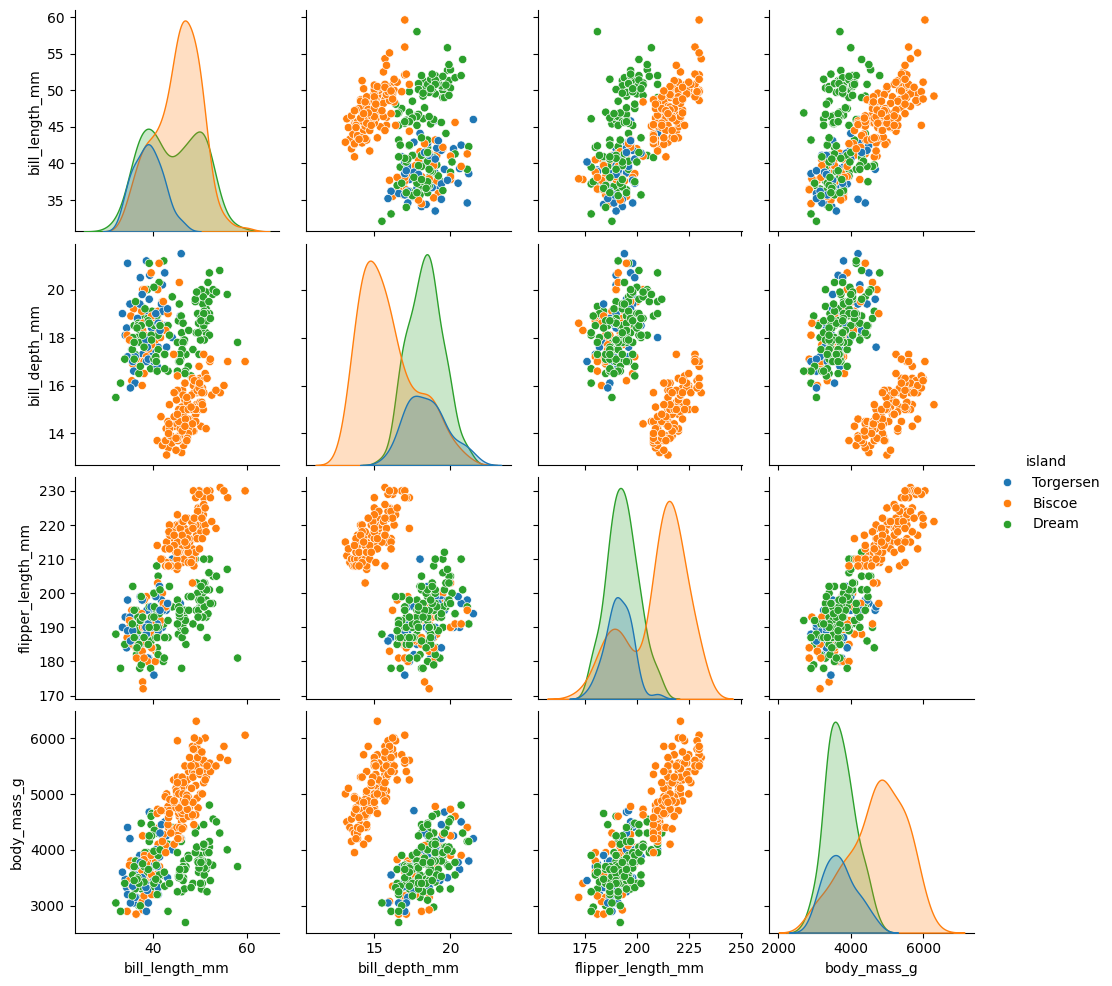

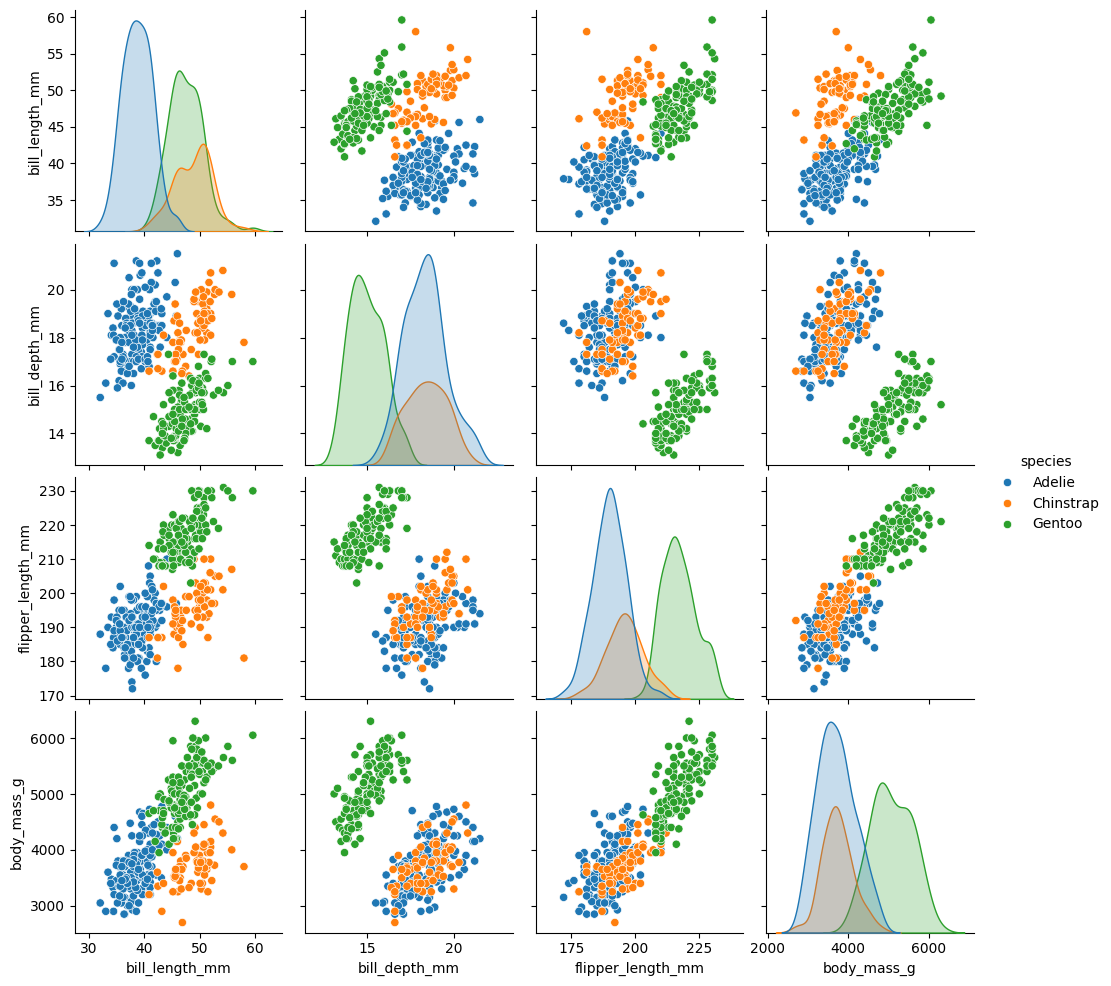

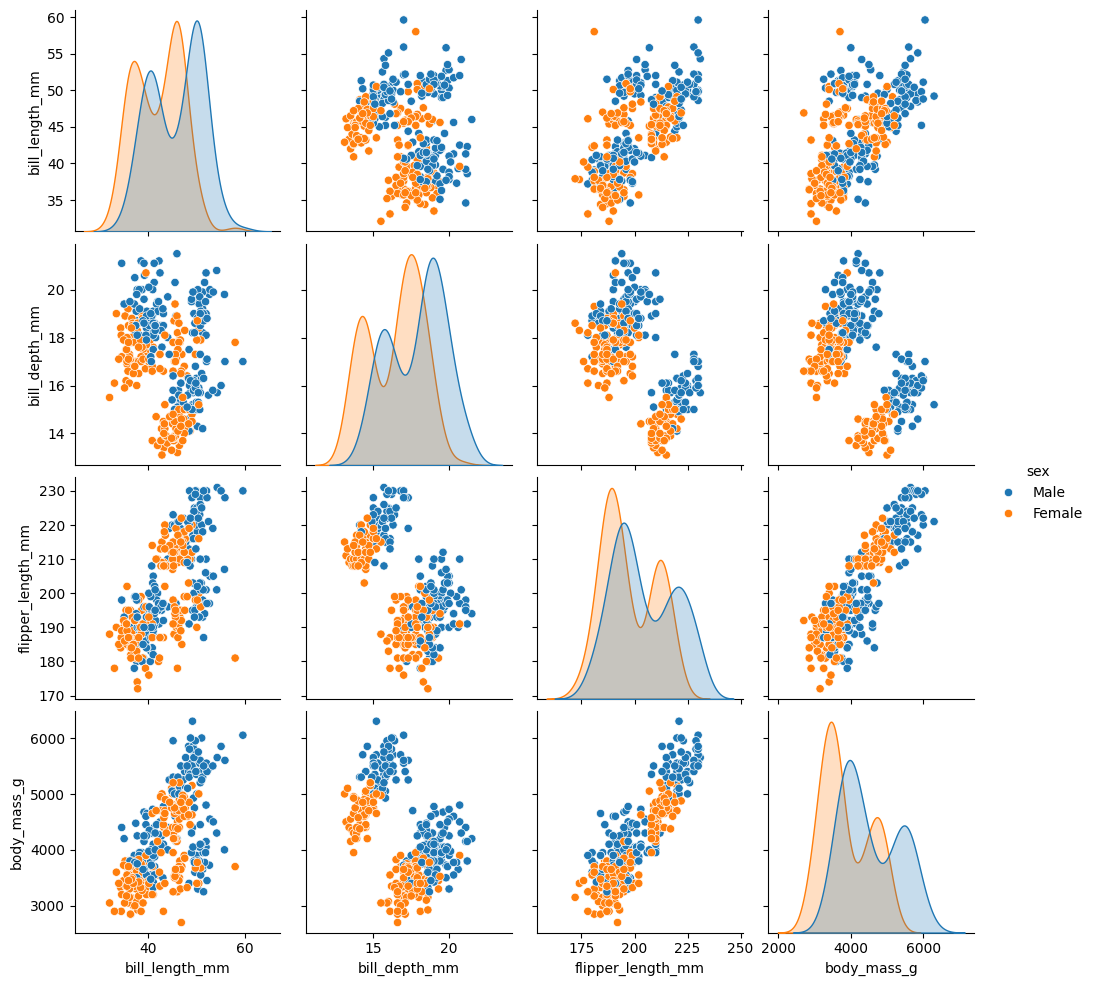

In [110]:
# Initial Visualizations
sns.pairplot(df,hue='island')
sns.pairplot(df,hue='species')
sns.pairplot(df,hue='sex')
# Other Visualizations
plt.show()